In [1]:
import sys

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from tqdm import tqdm
from itertools import combinations

sys.path.append("../src/")

import xgi
from reducibility_hg import *

from statannotations.Annotator import Annotator

sb.set_theme(style="ticks", context="paper")

In [2]:
results_dir = "../results/"
out_dir  = f"{results_dir}synthetic/"

In [3]:
def sigma(d):
    """
    Return d*(d+1)/2, the sum of the first d integers"""
    return d * (d + 1) / 2

## generate complete hypergraph

In [70]:
N = 30
rescale = False
d_max = 4

H0 = xgi.complete_hypergraph(N=N, max_order=d_max)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))


In [71]:
tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)

inverse_rescaling_factors = [1 / sigma(d) for d in orders]
Ds_H, lZs_H = optimization(H0, tau_c, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale)

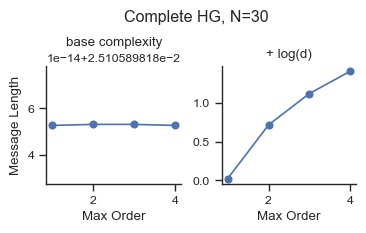

In [72]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(4, 2))

message_length = Ds_H + lZs_H

ax.plot(orders, message_length, "o-")

ax2.plot(orders, message_length + np.log(orders), "o-")

ax.set_ylabel("Message Length")
ax.set_xlabel("Max Order")

fig.suptitle(f"Complete HG, N={N}")
ax.set_title("base complexity")
ax2.set_title("+ log(d)")

ax2.set_xlabel("Max Order")

plt.subplots_adjust(top=0.7, wspace=0.3)

sb.despine()

fig_name = f"message_length_all_to_all_rescaled_tauc_N_{N}"

plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

## generate full triangular lattice

In [73]:
def triangular_lattice_flag(n_rows, p2, periodic=False):
    """
    Generates a flag complex from a triangular lattice graph.

    Parameters
    ----------
    n_rows : int
        Number of rows in the lattice.
    p2 : float
        Probability of adding a 2-simplex to the clique complex.
    periodic : bool, optional
        Whether the lattice should have periodic boundary conditions. Default is False.

    Returns
    -------
    S_lattice : xgi Simplicial Complex
        
    pos : dict
        Node positions keyed by node ID.        
    """
    
    # number of rows
    m = n_rows - 1
    # number of columns
    columns = n_rows + 1
    n = 2 * columns - 1

    if not periodic:
        n = n - 1
        m = m - 1

    # generate lattice
    G_lattice = nx.triangular_lattice_graph(m, n, periodic=periodic, with_positions=True)
    G_lattice = nx.convert_node_labels_to_integers(G_lattice)
    pos = nx.get_node_attributes(G_lattice, "pos")

    # generate random clique complex (fill in triangles)
    S_lattice = xgi.flag_complex_d2(G_lattice, p2=p2)
    return S_lattice, pos

In [74]:
n_rows = 16
rescale = False
d_max = 2
p_2 = 1

H0, _ = triangular_lattice_flag(n_rows, p2=p_2, periodic=True)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

N = H0.num_nodes

In [75]:
tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)

inverse_rescaling_factors = [1 / sigma(d) for d in orders]
Ds_H, lZs_H = optimization(H0, tau_c, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale)

logm result may be inaccurate, approximate err = 3.02111782585945e-13
logm result may be inaccurate, approximate err = 3.02111782585945e-13


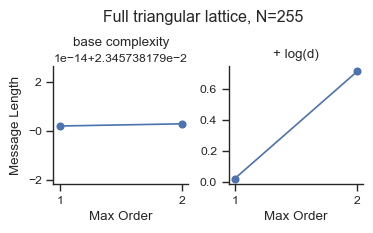

In [76]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(4, 2))

message_length = Ds_H + lZs_H

ax.plot(orders, message_length, "o-")

ax2.plot(orders, message_length + np.log(orders), "o-")

ax.set_ylabel("Message Length")
ax.set_xlabel("Max Order")

fig.suptitle(f"Full triangular lattice, N={N}")
ax.set_title("base complexity")
ax2.set_title("+ log(d)")

ax2.set_xlabel("Max Order")
ax.set_xticks([1, 2])
ax2.set_xticks([1, 2])

plt.subplots_adjust(top=0.7, wspace=0.3)

sb.despine()

fig_name = f"message_length_full_triangular_lattice_rescaled_tauc_N_{N}"

plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

In [39]:
np.diff(message_length)

array([8.8817842e-16])

## try dataset

In [77]:
data_names = [
    "email-enron",
    "email-eu",
    "hospital-lyon",
    "contact-high-school",
    "contact-primary-school",
    "tags-ask-ubuntu",
    "congress-bills",
    #"disgenenet",
    #"diseasome",
    #"ndc-substances",
    #"coauth-mag-geology",
    #"coauth-mag-history",
]

HGs = {}
for name in tqdm(data_names): 
    HGs[name] = xgi.load_xgi_data(name, max_order=None, cache=True)

100%|█████████████████████████████████████████████| 7/7 [00:07<00:00,  1.14s/it]


In [88]:
i = 0 # choose dataset here
name = data_names[i]
print(name)
H0 = HGs[name]
print(H0)
print("max order:", xgi.max_edge_order(H0))
H0.cleanup(isolates=True)
print(H0)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

email-enron
Hypergraph named email-Enron with 148 nodes and 10885 hyperedges
max order: 36
Hypergraph named email-Enron with 148 nodes and 1459 hyperedges


In [ ]:
tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)

inverse_rescaling_factors = [1 / sigma(d) for d in orders]
Ds_H, lZs_H = optimization(H0, tau_c, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale)

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(4, 2))

message_length = Ds_H + lZs_H

ax.plot(orders, message_length, "o-")

ax2.plot(orders, message_length + np.log(orders), "o-")

ax.set_ylabel("Message Length")
ax.set_xlabel("Max Order")

fig.suptitle(f"{name}")
ax.set_title("base complexity")
ax2.set_title("+ log(d)")

ax2.set_xlabel("Max Order")
#ax.set_xticks(orders)
#ax2.set_xticks(orders)

plt.subplots_adjust(top=0.7, wspace=0.3)

sb.despine()

fig_name = f"message_length_{name}_rescaled_tauc"

plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")